In [3]:
pip install ucimlrepo

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# **Wine Dataset**

## 1. Context
Using chemical analysis to determine the origin of wines

#### Attribute information
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Input Features: \
1. Alcohol \
2. Malic acid \
3. Ash \
4. Alcalinity of ash \
5. Magnesium \
6. Total phenols \
7. Flavanoids \
8. Nonflavanoid phenols \
9. Proanthocyanins \
10. Color intensity \
11. Hue \
12. OD280/OD315 of diluted wines \
13. Proline

Output variables: \
1. Class

## 2. Load and clean dataset

> Indented block



In [21]:
# fetch dataset
wine = fetch_ucirepo(id=109)
wine_df = pd.concat([wine.data.features, wine.data.targets], axis=1)

# drop null values
wine_df.dropna(inplace=True)

## 3. Analyze data

### 3.1 Basic Information

In [22]:
wine_df.info()

# metadata
# print(wine.metadata)

# variable information
# print(wine.variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [23]:
# Computing basic statistics
wine_df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### 3.2 Univariate analysis: Target

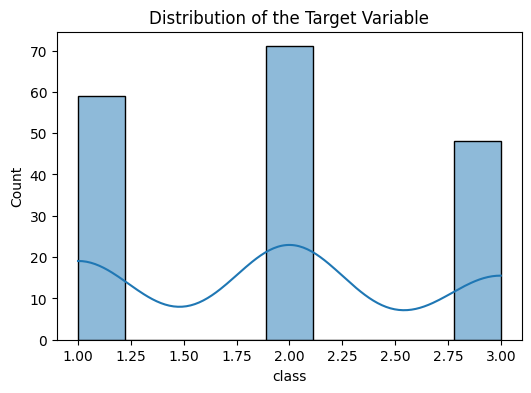

In [29]:
plt.figure(figsize=(6, 4))
sns.histplot(wine_df['class'], kde=True)
plt.title('Distribution of the Target Variable')
plt.xlabel('class')
plt.show()

## 3.3 Univariate analysis: Features

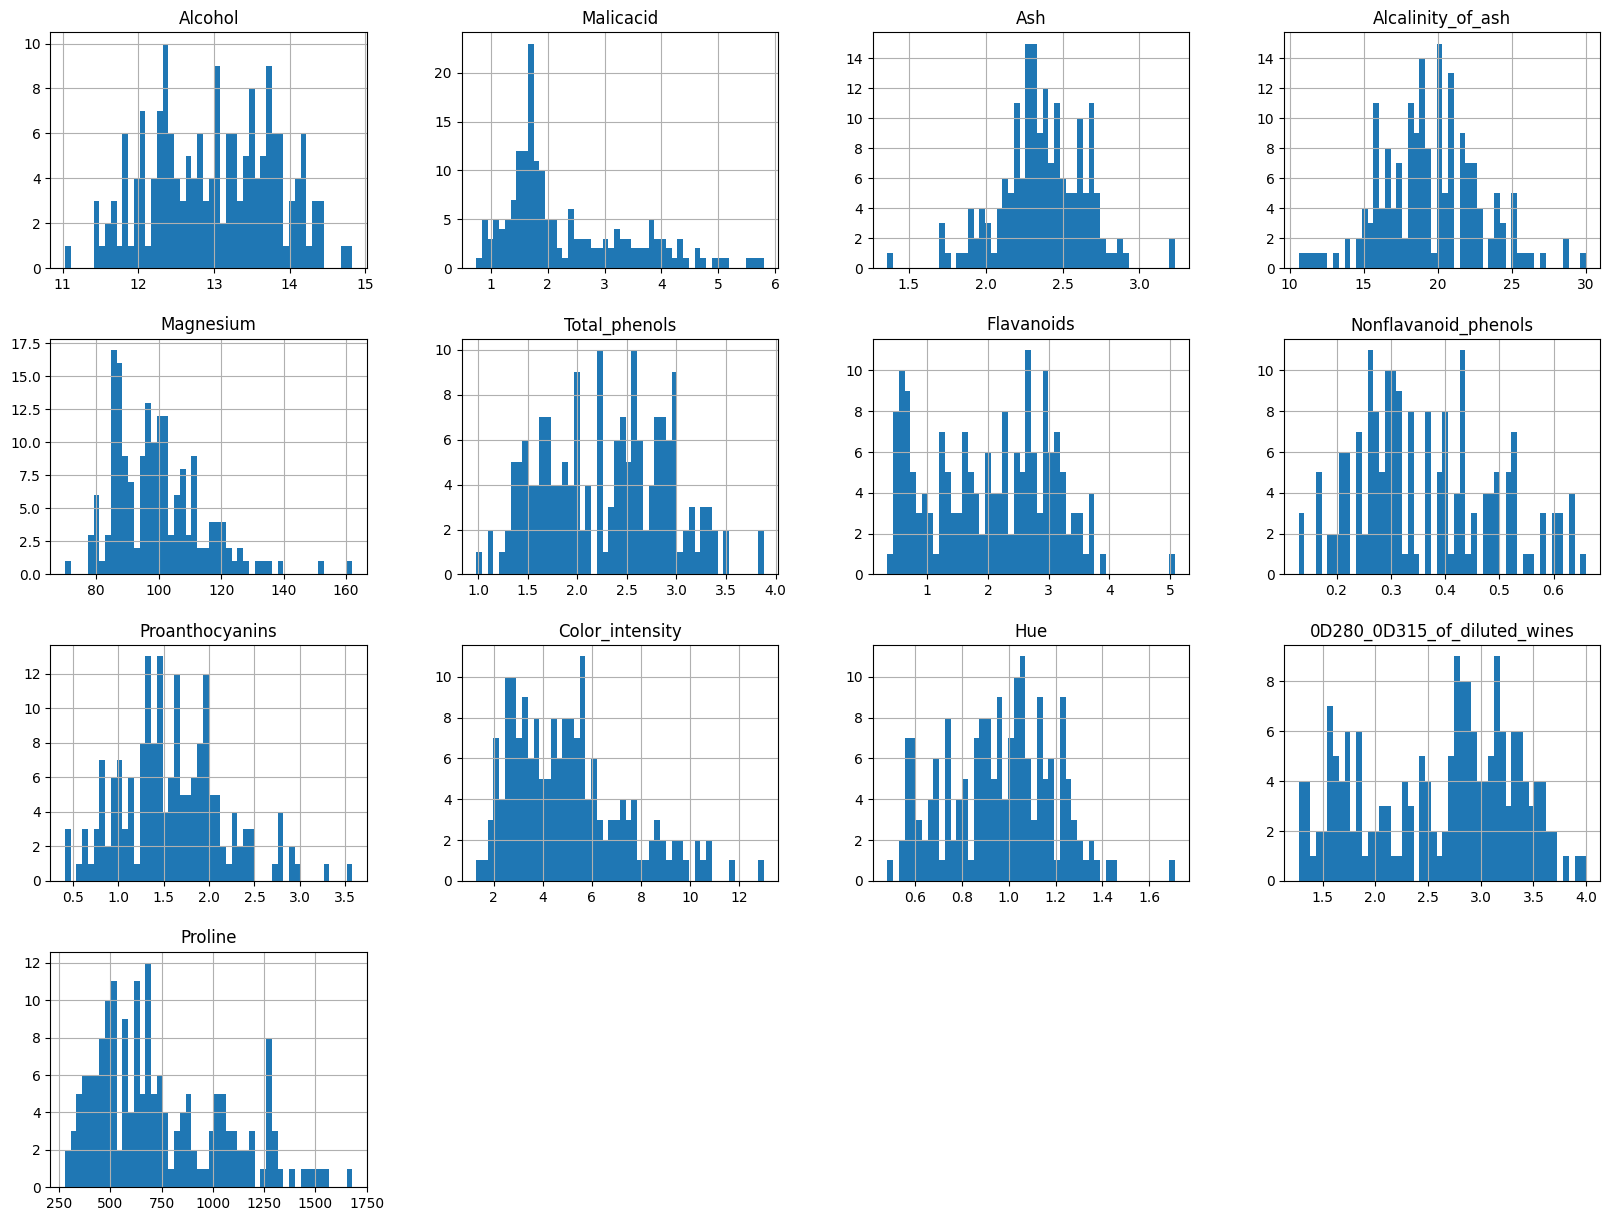

In [30]:
# plot histograms of feature class distributions
wine_df.drop('class', axis=1).hist(bins=50, figsize=(20,15))
plt.show()

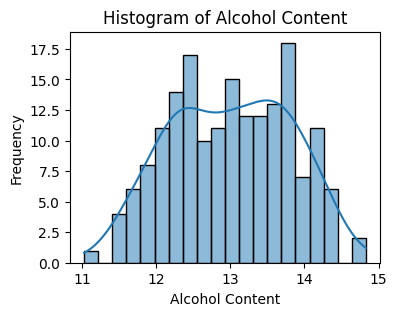

In [34]:
# Example for the 'Alcohol' feature - Histogram
plt.figure(figsize=(4, 3))
sns.histplot(wine_df['Alcohol'], bins=20, kde=True)
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol Content')
plt.show()

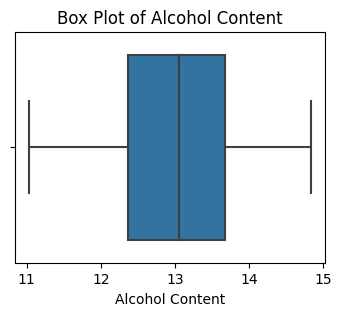

In [33]:
# Example for the 'Alcohol' feature - Box plot
plt.figure(figsize=(4, 3))
sns.boxplot(x='Alcohol', data=wine_df)
plt.xlabel('Alcohol Content')
plt.title('Box Plot of Alcohol Content')
plt.show()

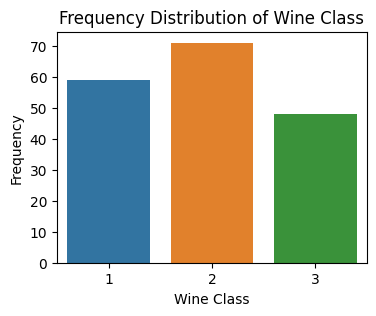

In [36]:
# Frequency distribution of 'class'
plt.figure(figsize=(4, 3))
sns.countplot(x='class', data=wine_df)
plt.xlabel('Wine Class')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Wine Class')
plt.show()

### Correlation analysis

In [26]:
correlation_matrix = wine_df.corr()

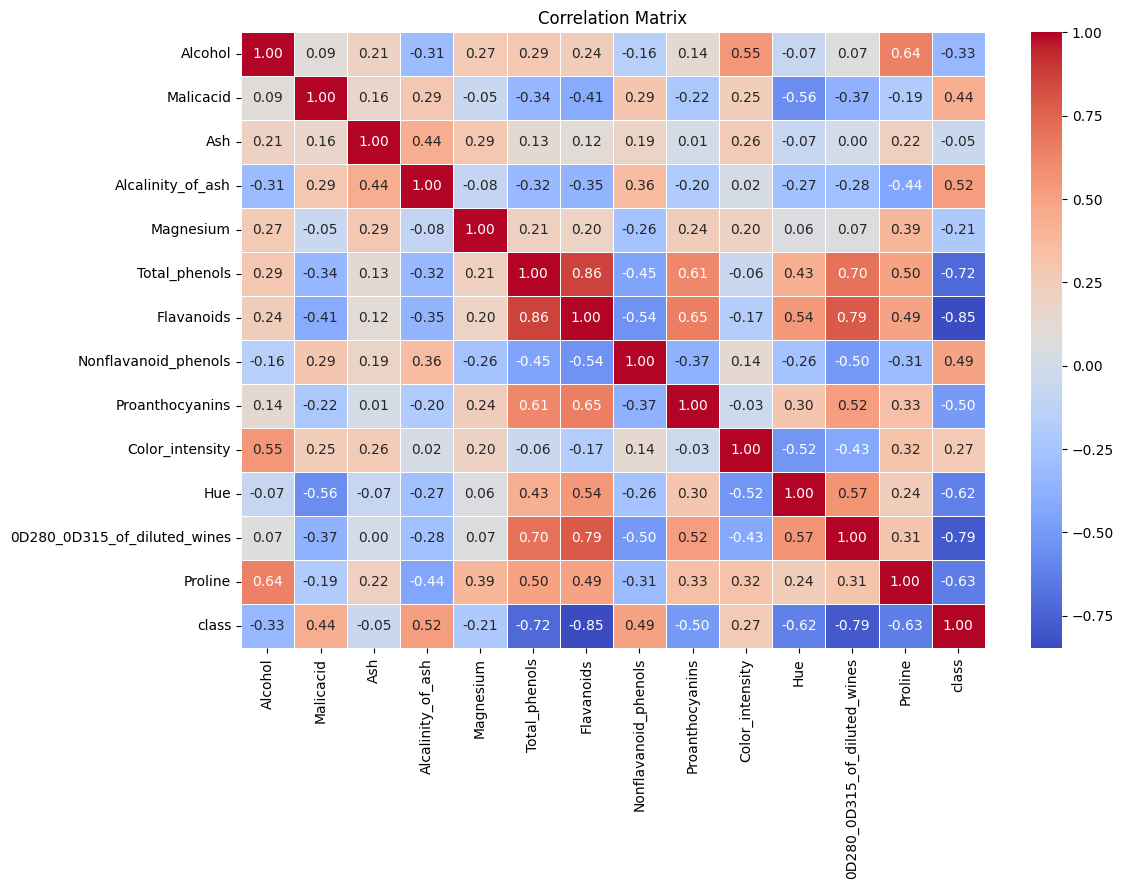

In [27]:
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()